# SARIMAX MODEL

In [3]:

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib
pd.set_option('display.max_rows', 2700)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:

import warnings
warnings.filterwarnings("ignore")


In [5]:
ts=pd.read_csv("delhi_AQIclean.csv",index_col=0)
ts.head()

,pm25
date,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


plotting AR model


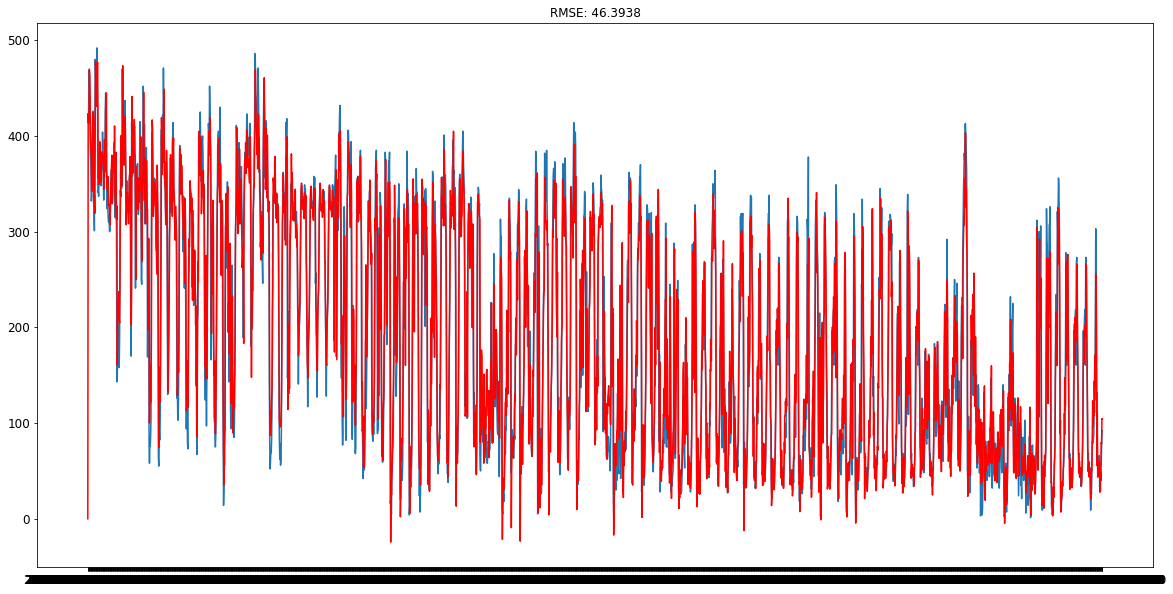

In [6]:
#create the model
import statsmodels.api as sm
#plot AR model
plt.figure(figsize=(20,10))
model=sm.tsa.statespace.SARIMAX(ts,order=(2, 1, 2),seasonal_order=(2,0,2,24))
results_AR=model.fit(disp=-1)
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts['pm25'])**2))
plt.title('RMSE: %.4f'% np.sqrt(((results_AR.fittedvalues - ts["pm25"]) ** 2).mean()))
#plt.title('MAPE: %.4f'% np.mean(np.abs((results_AR.fittedvalues - data_shift['pm25'])/results_AR.fittedvalues))*100)
print('plotting SARIMAX model')


In [10]:
model_fit = results_AR#model.fit()

In [24]:
'RSS: %.4f'% sum((results_AR.fittedvalues-ts['pm25'])**2)

'RSS: 5632793.4855'

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               pm25   No. Observations:                 2617
Model:             SARIMAX(2, 1, 2)x(2, 0, 2, 24)   Log Likelihood              -13710.449
Date:                            Tue, 04 May 2021   AIC                          27438.899
Time:                                    22:56:54   BIC                          27491.723
Sample:                                01-01-2018   HQIC                         27458.033
                                     - 04-20-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8073      0.042     19.128      0.000       0.725       0.890
ar.L2         -0.0848      0.032     -2.691      0.007      -0.147      -0.023
ma.L1         -0.8715      0.046    -19.115      0.000      -0.961      -0.782
ma.L2         -0.1223      0.045     -2.708      0.007      -0.211      -0.034
ar.S.L24       1.1749      0.113     10.377      0.000       0.953       1.397
ar.S.L48      -0.1797      0.112     -1.604      0.109      -0.399       0.040
ma.S.L24      -0.9791      0.115     -8.531      0.000      -1.204      -0.754
ma.S.L48       0.0262      0.105      0.249      0.803      -0.180       0.232
sigma2      2061.5937     39.046     52.800      0.000    1985.066    2138.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1014.22
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         6.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
np.mean(np.abs((results_AR.fittedvalues.iloc[1:]-ts['pm25'].iloc[1:] )/results_AR.fittedvalues.iloc[1:] ))*100

27.7591298041795

In [13]:
prediction_info = model_fit.forecast(240)

predictions = prediction_info


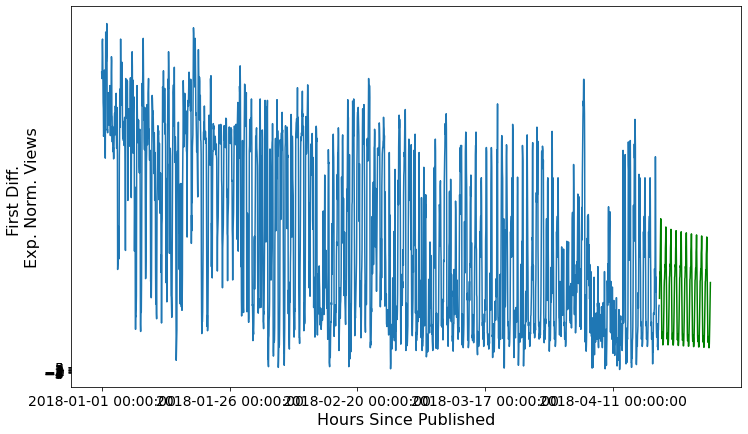

In [14]:
plt.figure(figsize=(12,7))
plt.plot(ts)

plt.xticks(np.arange(0,2700,600), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-4,6,1), fontsize=14)
plt.ylabel('First Diff. \nExp. Norm. Views', fontsize=16)

plt.plot(np.arange(len(ts)+1, len(ts)+241), predictions, color='g')


In [15]:
prediction_info

2018-04-20 01:00:00    102.051502
2018-04-20 02:00:00    120.442912
2018-04-20 03:00:00    139.117703
2018-04-20 04:00:00    137.229563
2018-04-20 05:00:00    162.962311
2018-04-20 06:00:00    183.909366
2018-04-20 07:00:00    214.992671
2018-04-20 08:00:00    179.761148
2018-04-20 09:00:00    144.638860
2018-04-20 10:00:00    115.172594
2018-04-20 11:00:00     76.933851
2018-04-20 12:00:00     52.954981
2018-04-20 13:00:00     44.713128
2018-04-20 14:00:00     47.232636
2018-04-20 15:00:00     54.295135
2018-04-20 16:00:00     51.751448
2018-04-20 17:00:00     35.937113
2018-04-20 18:00:00     37.075117
2018-04-20 19:00:00     40.401596
2018-04-20 20:00:00     56.720963
2018-04-20 21:00:00     71.299172
2018-04-20 22:00:00     90.946117
2018-04-20 23:00:00    117.217699
2018-04-21 00:00:00    127.404535
2018-04-21 01:00:00    130.460785
2018-04-21 02:00:00    142.781178
2018-04-21 03:00:00    149.978124
2018-04-21 04:00:00    146.792559
2018-04-21 05:00:00    173.225316
2018-04-21 06: